# Wonky Tops
### Marina Ten, Floris Strijbos, Tom Wade

In [2]:
import pandas as pd
import numpy as np
import ipyvolume as ipv

In [3]:
%pwd

'C:\\Apps\\Hackathon_Dec2018\\wonkeycontact'

In [4]:
from pandas import read_excel
my_sheet_name = 'Sheet1' 
df = read_excel('balder.xlsx', sheet_name = my_sheet_name)
print(df.head()) # shows headers with top 5 rows
count = []
for interp in df['Interpreter'].unique():
    #print(interp)
    #print(df.loc[df['Interpreter']== interp].count()[1])
    count.append(df.loc[df['Interpreter']== interp].count()[1])
    #print(count)

interp = df['Interpreter'].unique().tolist()
int_cnt = np.column_stack((interp, count))  
print(int_cnt)
print(int_cnt[np.unravel_index(np.argmax(int_cnt), int_cnt.shape)])


              UID     Well          Top Interpreter  N  Depth_MD  Depth_tvdss  \
0  11000010003604   AA02S3  T Balder Fm       SUKEP  1   4040.51   -2115.9756   
1  11000010003604   AA02S3  B Balder Fm       SUKEP  1   4097.16   -2134.8250   
2  11000010003803   AA04S2  T Balder Fm       SUKEP  1   3840.03   -2103.9250   
3  11000010003803   AA04S2  B Balder Fm       SUKEP  1   3888.82   -2124.2317   
4  11000010058902  CUB P1M  T Balder Fm        PETR  1   2552.04   -2526.8508   

         Easting      Northing  
0  629441.169920  6.250712e+06  
1  629479.499624  6.250675e+06  
2  629112.554197  6.250618e+06  
3  629153.269214  6.250601e+06  
4  577270.102010  6.287584e+06  
[['SUKEP' '3140']
 ['PETR' '14']
 ['FMB' '1193']
 ['SEM0' '11']
 ['RFN' '11']
 ['RESUN' '152']
 ['SHW07' '10']
 ['BAN' '46']
 ['FRH' '13']
 ['RLL' '21']
 ['SAMS' '25']
 ['NBOA' '1']
 ['JCBJ' '8']
 ['CEL0' '4']
 ['MDW' '1']
 ['JDHA' '4']
 ['JT' '14']
 ['RMP' '16']
 ['CKING' '1']
 ['FRAMD' '12']
 ['GBMVI' '34']
 ['B

In [ ]:
#df.loc[:,['UID','Well','Top','Interpreter','Depth_MD','Easting','Northing','Depth_tvdss']]

In [ ]:
#df.loc[df.Top.isin(['AS11.2','T AS11.2']), ['Easting','Northing','Depth_tvdss']]

In [5]:
xyz=df.loc[df['Interpreter'] == int_cnt[np.unravel_index(np.argmax(int_cnt), int_cnt.shape)], [ 'Easting','Northing','Depth_tvdss']].values
print(xyz)

[[ 6.29441170e+05  6.25071247e+06 -2.11597560e+03]
 [ 6.29479500e+05  6.25067526e+06 -2.13482500e+03]
 [ 6.29112554e+05  6.25061822e+06 -2.10392500e+03]
 ...
 [ 5.57689260e+05  6.32232442e+06 -1.99415760e+03]
 [ 5.57689260e+05  6.32232442e+06 -1.99415760e+03]
 [ 5.57689260e+05  6.32232442e+06 -2.00391160e+03]]


In [6]:
#Exctract XYZ values for processing
x=xyz[:,0]
y=xyz[:,1]
z=xyz[:,2]

In [7]:
#Get extents of input data
xmin=x.min() ; ymin=y.min() ; xmax=x.max() ; ymax=y.max() ; zmin=z.min() ; zmax=z.max()
print(zmin,zmax)

-8486.4648 -466.31


### Initial processing to mathematically remove obvious outliers

In [8]:
def outliers_iqr(z):
    """
    The interquartile range (IQR), also called the midspread or middle 50%, 
    or technically H-spread, is a measure of statistical dispersion, being equal to the difference 
    between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
    In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles 
    can be clearly seen on a box plot on the data.
    It is a measure of the dispersion similar to standard deviation or variance, but is much more robust 
    against outliers.
    """
    quartile_1, quartile_3 = np.percentile(z, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((z > upper_bound) | (z < lower_bound))
iqr_test = outliers_iqr(z)[0].tolist()
x_smooth = np.delete(x,iqr_test)
y_smooth = np.delete(y,iqr_test)
z_smooth = np.delete(z,iqr_test)
ipv.figure()
s = ipv.scatter(x_smooth, y_smooth, z_smooth, marker='sphere', size=3)
ipv.xlim(xmin,xmax)
ipv.ylim(ymin,ymax)
ipv.zlim(-3000,-1500)
ipv.animation_control(s)# shows controls for animation controls
ipv.selector_default()
ipv.show()

Output()

### Iterative interactive editing, round1

In [9]:
#Select points in plot above interactively, using CTRL-R
s_sel=s.selected
k=s_sel[0].tolist()

In [10]:
#Pick up points edited in first 'outlier edit' funtion
x= x_smooth
y = y_smooth
z = z_smooth

In [11]:
#Delete the points
xdel=np.delete(x,k)
ydel=np.delete(y,k)
zdel=np.delete(z,k)

In [12]:
#Redraw the plot with the update pointset
ipv.figure()
sdel = ipv.scatter(xdel, ydel, zdel, marker='sphere', size=3)
ipv.xlim(xmin,xmax)
ipv.ylim(ymin,ymax)
ipv.zlim(-4000,-1500)
ipv.animation_control(s)# shows controls for animation controls
ipv.selector_default()
ipv.show()

Output()

### Second edit iteration

In [13]:
#Select points in plot above, using CTRTL-R. Then procede to select and delete:
k2=sdel.selected[0].tolist()

In [14]:
#Delete the selected points
xdel2=np.delete(xdel,k2)
ydel2=np.delete(ydel,k2)
zdel2=np.delete(zdel,k2)

In [15]:
#Redraw the plot. Presume no further edits after this
ipv.figure()
sdel2 = ipv.scatter(xdel2, ydel2, zdel2, marker='sphere', size=3)
ipv.xlim(xmin,xmax)
ipv.ylim(ymin,ymax)
ipv.zlim(-4000,-1500)
ipv.animation_control(s)# shows controls for animation controls
ipv.selector_default()
ipv.show()

Output()

### Grid up  edited data

In [16]:
#Reassign edited data to X,Y,Z variable
x, y, z = xdel2, ydel2, zdel2

### Grid Tops via minimum curvature
##### Note this was our first gridding approach. However, a depopulated appoach is going to be preferred...

In [17]:
#Create a grid outline from tops data extent. Start printing extent
print("Xmin = {} , XMax = {}\nYmin = {}, Ymax= {}\nZmin = {}, Zmax = {}".format(xmin, xmax, ymin, ymax, zmin, zmax))

Xmin = 436460.88539981 , XMax = 686576.0
Ymin = 6212820.50522514, Ymax= 6530220.47604041
Zmin = -8486.4648, Zmax = -466.31


In [18]:
#Create sensible grid outline of integers. Currently hardcoded...
extent = [490000, 690000, 6200000, 6530000] #Sensible numbers from observed Xmin and Ymin. Defines Grid
grid_int = 1000 #Hard coded grid spacing
#Create arrays of the x and y axis
x_points = int((extent[1] - extent[0]) / grid_int) #Number of samples in the X-Direction
y_points = int((extent[3] - extent[2]) / grid_int) #Number of samples in the Y-Direction

In [19]:
#Create the grid. interval expressed by complex numbers
grid_x, grid_y = np.mgrid[extent[0]:extent[1]:complex(x_points), extent[2]:extent[3]:complex(y_points)]

In [20]:
#Create numpy arrays of point co-ordinates and then values from input data
points = np.array(list(zip(x, y)))
values = z

In [21]:
#Perform interpolation of data in to the specified grid using scipy
from scipy.interpolate import griddata
gridded = griddata(points, values, (grid_x, grid_y), method='linear')

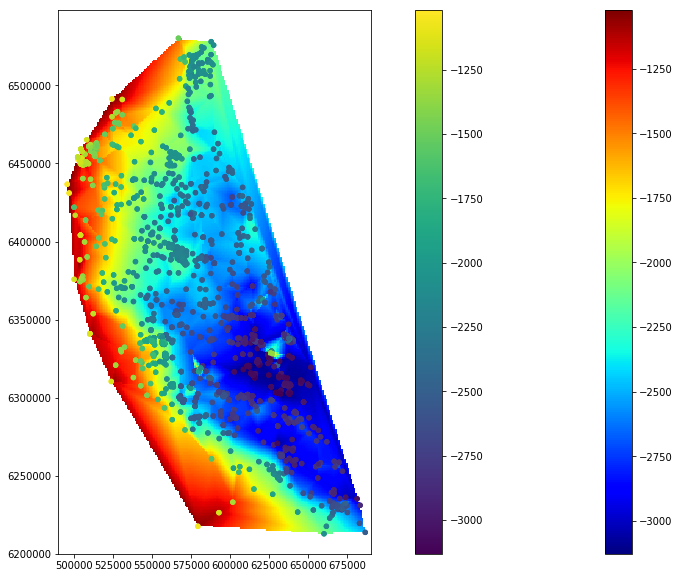

In [22]:
#Initial plot, Pre-Residuals. Can probs delete later
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.imshow(gridded.T, origin='lower', extent=extent, cmap='jet')
plt.colorbar()
plt.scatter(x, y, s=20, c=z)

#plt.gray()
plt.colorbar()

In [ ]:
from scipy.interpolate import Rbf
rbfi = Rbf(x, y, z, smooth = 2, function = 'multiquadric')
di = rbfi(grid_x,grid_y)


In [ ]:
plt.imshow(di.T, origin = 'lower')

### Residuals Extraction

In [23]:
import bruges #Utilise the coordinate transformation functions

In [24]:
gridded.shape
print(gridded)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [25]:
# UTM coords of 3 unique inline, crossline locations. Taken from grid extents (realworld)
corners_xy = np.array([[490000, 62000000],
                       [490000, 6530000],
                       [690000, 6530000]])

# The inline, crossline locations you just provided. Also Grid extent, but as indices given by grid.shape
corners_ix = np.array([[0,  0],
                       [0, 330],
                       [200, 0]])

In [26]:
transform = bruges.transform.CoordTransform(corners_ix, corners_xy)

In [27]:
#Pissing about to  create lists of well-top coordinates (as currently in np.array). Then transform
xlist = x.tolist()
ylist = y.tolist()
merge = list(zip(xlist, ylist))
coordinates = []
for i in merge:
    coordinates.append(transform.reverse([i[0], i[1]]))

In [28]:
#Then convert the indicies back to numpy arrays
xcors = np.array([item[0] for item in coordinates])
ycors = np.array([item[1] for item in coordinates])

In [29]:
#Extract the value of the grid at the well top locations
z_gridded = gridded[(xcors, ycors)]

In [30]:
#Calculate the residuals by subtracting gridded value from input top value
residuals = z - z_gridded

In [31]:
#Put the residuals in to a dataframe for visualisation
d = {'x': x, 'y': y, 'z':z, 'z_gridded': z_gridded, 'residual': residuals}
res_df = pd.DataFrame(data=d)
res_df.head(20)

,x,y,z,z_gridded,residual
0,629441.169920,6.250712e+06,-2115.9756,-3059.512731,943.537131
1,629479.499624,6.250675e+06,-2134.8250,-3059.512731,924.687731
2,629112.554197,6.250618e+06,-2103.9250,-3059.512731,955.587731
3,629153.269214,6.250601e+06,-2124.2317,-3059.512731,935.281031
4,577270.780209,6.287585e+06,-2514.4402,-2323.648133,-190.792067
5,577269.395824,6.287584e+06,-2538.1541,-2323.648133,-214.505967
6,580516.321107,6.287974e+06,-2503.5225,-2430.150630,-73.371870
7,580516.840671,6.287975e+06,-2520.8550,-2430.150630,-90.704370
8,580072.627013,6.287790e+06,-2488.2112,-2400.160535,-88.050665
9,580071.922093,6.287790e+06,-2509.8264,-2400.160535,-109.665865


In [32]:
res_df['Dupl'] = res_df.duplicated(subset = ['x','y'], keep = False)
#res_df.head(20)
#print(res_df.loc[res_df['Dupl'] == True,  ['Dupl','x','y','residual']])
cln_df = res_df.loc[res_df['Dupl'] == False,  ['x','y','z','residual']]
cln_df.head()
x, y,z  = cln_df.x, cln_df.y, cln_df.z


In [33]:
points = np.array(list(zip(x, y)))
values = z
cln_gridded = griddata(points, values, (grid_x, grid_y), method='linear')

'\nfor i, txt in enumerate(res_list_txt):\n    plt.annotate(txt, (x[i], y[i]) , size=10)\n'

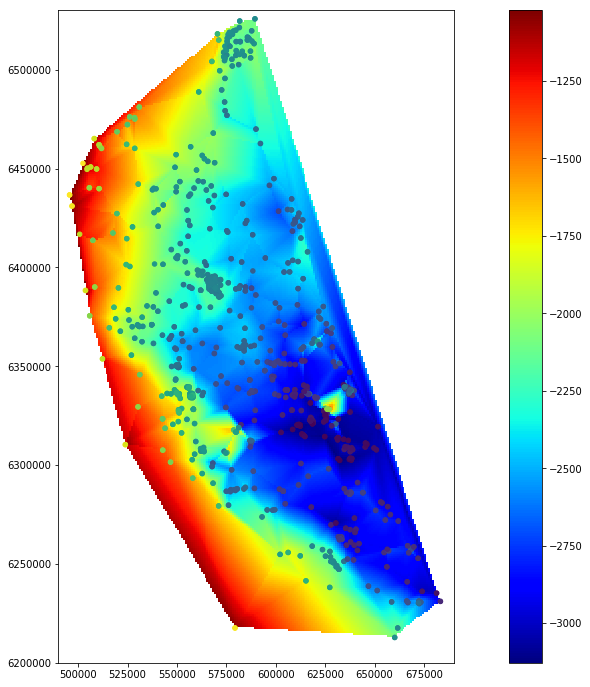

In [36]:
#Plot image of grid, this time with residual annotations
plt.figure(figsize=(20,12))
plt.imshow(cln_gridded.T, origin='lower', extent=extent, cmap='jet')
plt.colorbar()

#Plot well tops and residuals
plt.scatter(x, y, s=20, c=z)

res_list = residuals.tolist()
res_list_txt = [str(round(i, 2)) for i in res_list]
"""
for i, txt in enumerate(res_list_txt):
    plt.annotate(txt, (x[i], y[i]) , size=10)
"""

### Residual Histogram

c:\Apps\Program Files\Continuum\Anaconda3\envs\geocomp\lib\site-packages\numpy\lib\function_base.py:697: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
c:\Apps\Program Files\Continuum\Anaconda3\envs\geocomp\lib\site-packages\numpy\lib\function_base.py:698: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
c:\Apps\Program Files\Continuum\Anaconda3\envs\geocomp\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Apps\Program Files\Continuum\Anaconda3\envs\geocomp\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


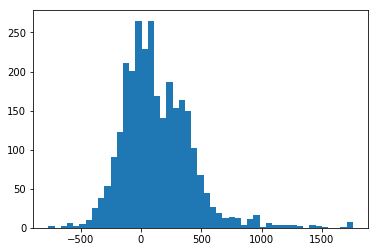

In [37]:
rng = np.nanmin(res_list), np.nanmax(res_list)
n, bins, _ = plt.hist(res_list, bins='auto',  range=rng)

In [38]:
bins = (bins[1:] + bins[:-1]) / 2

<BarContainer object of 49 artists>

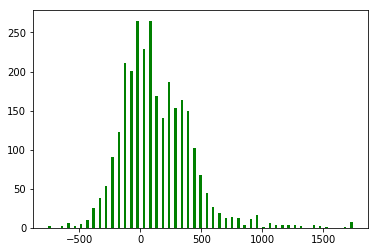

In [39]:
plt.bar(bins, n, width=20, color='g')

### 2d Fourier Transform

In [ ]:
#Subset data to rectangle. In final version, will have already selected rectangle in ipyvolume phase

In [ ]:
gridded.shape

In [ ]:
ft = np.fft.fft2(gridded)